In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
%matplotlib inline
plt.style.use('ggplot')

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


import warnings
warnings.filterwarnings(action='ignore')

# 기초 데이터

```
id: 데이터 고유 id
age: 나이
sex: 성별 (여자 = 0, 남자 = 1)

cp: 가슴 통증(  0 : 무증상,  1: 일반 통증,  2: 협심증)
trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
restecg: (resting electrocardiographic) 휴식 중 심전도 결과 ( 0 : showing probable or definite left ventricular hypertrophy by Estes' criteria. 1: 정상,2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: (maximum heart rate achieved) 최대 심박수
exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기( 0: downsloping 하강,   1: flat 평탄, 2: upsloping 상승)
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)   Null 값은 숫자 4로 인코딩됨 
thal: thalassemia 지중해빈혈 여부(0 = Null,   1 =  정상,  2 = 고정 결함,  3 = 가역 결함)



```

# 데이터 로드

In [3]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

# 데이터 확인

In [4]:
train.shape , test.shape

((151, 15), (152, 14))

In [5]:
train.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [6]:
test.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,3,57,1,2,150,126,1,1,173,0,0.2,2,1,3


In [7]:
train.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## 결측치 확인

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        150 non-null    int64  
 1   age       150 non-null    int64  
 2   sex       150 non-null    int64  
 3   cp        150 non-null    int64  
 4   trestbps  150 non-null    int64  
 5   chol      150 non-null    int64  
 6   fbs       150 non-null    int64  
 7   restecg   150 non-null    int64  
 8   thalach   150 non-null    int64  
 9   exang     150 non-null    int64  
 10  oldpeak   150 non-null    float64
 11  slope     150 non-null    int64  
 12  ca        150 non-null    int64  
 13  thal      150 non-null    int64  
 14  target    150 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 22.8 KB


In [9]:
train.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### -> 결측치 없워

##  기초 통계분석

In [10]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [11]:
# id를 제외한 모든 칼럼
cols = train.columns[1:]
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

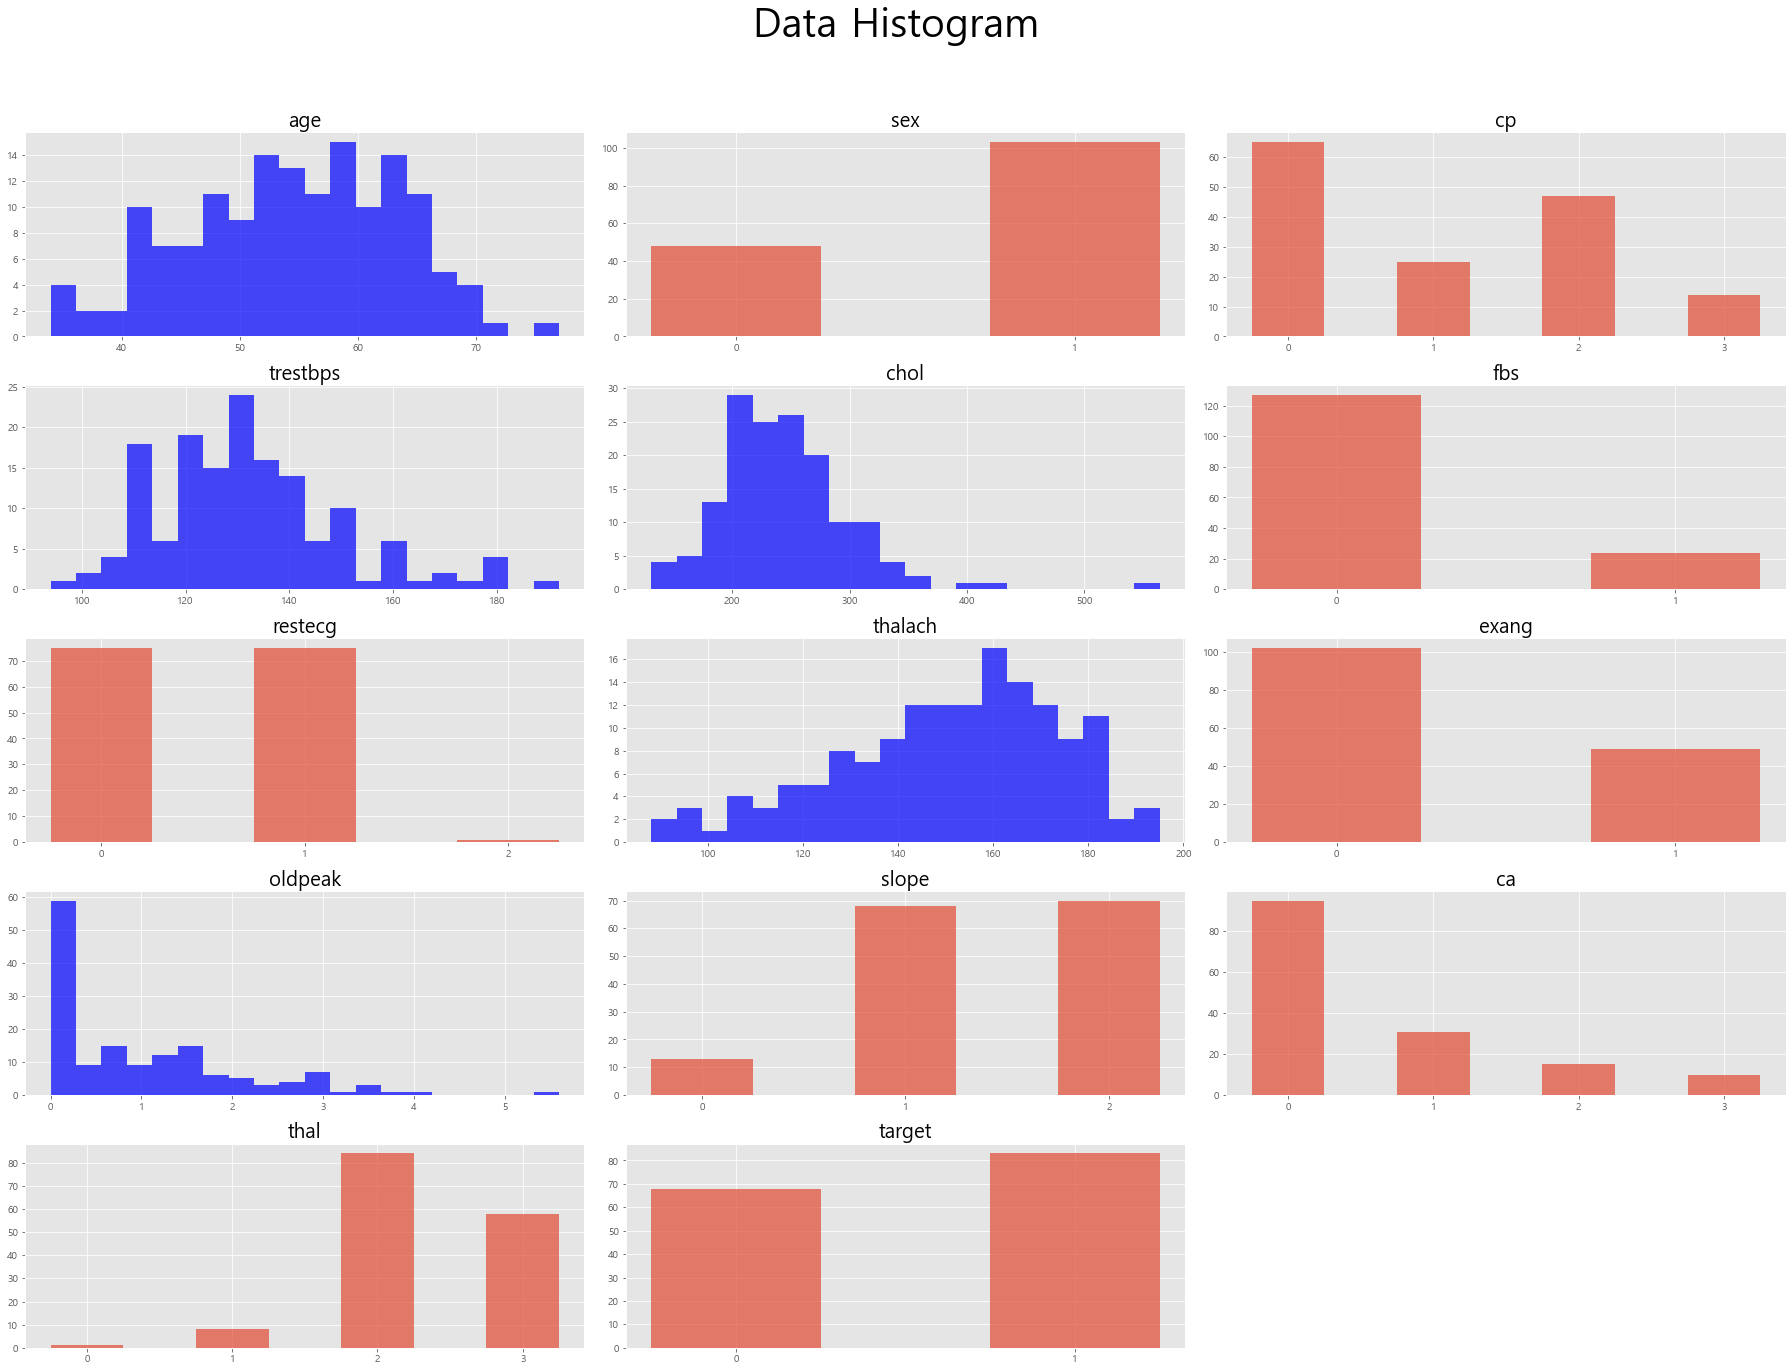

In [12]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 상관관계 확인

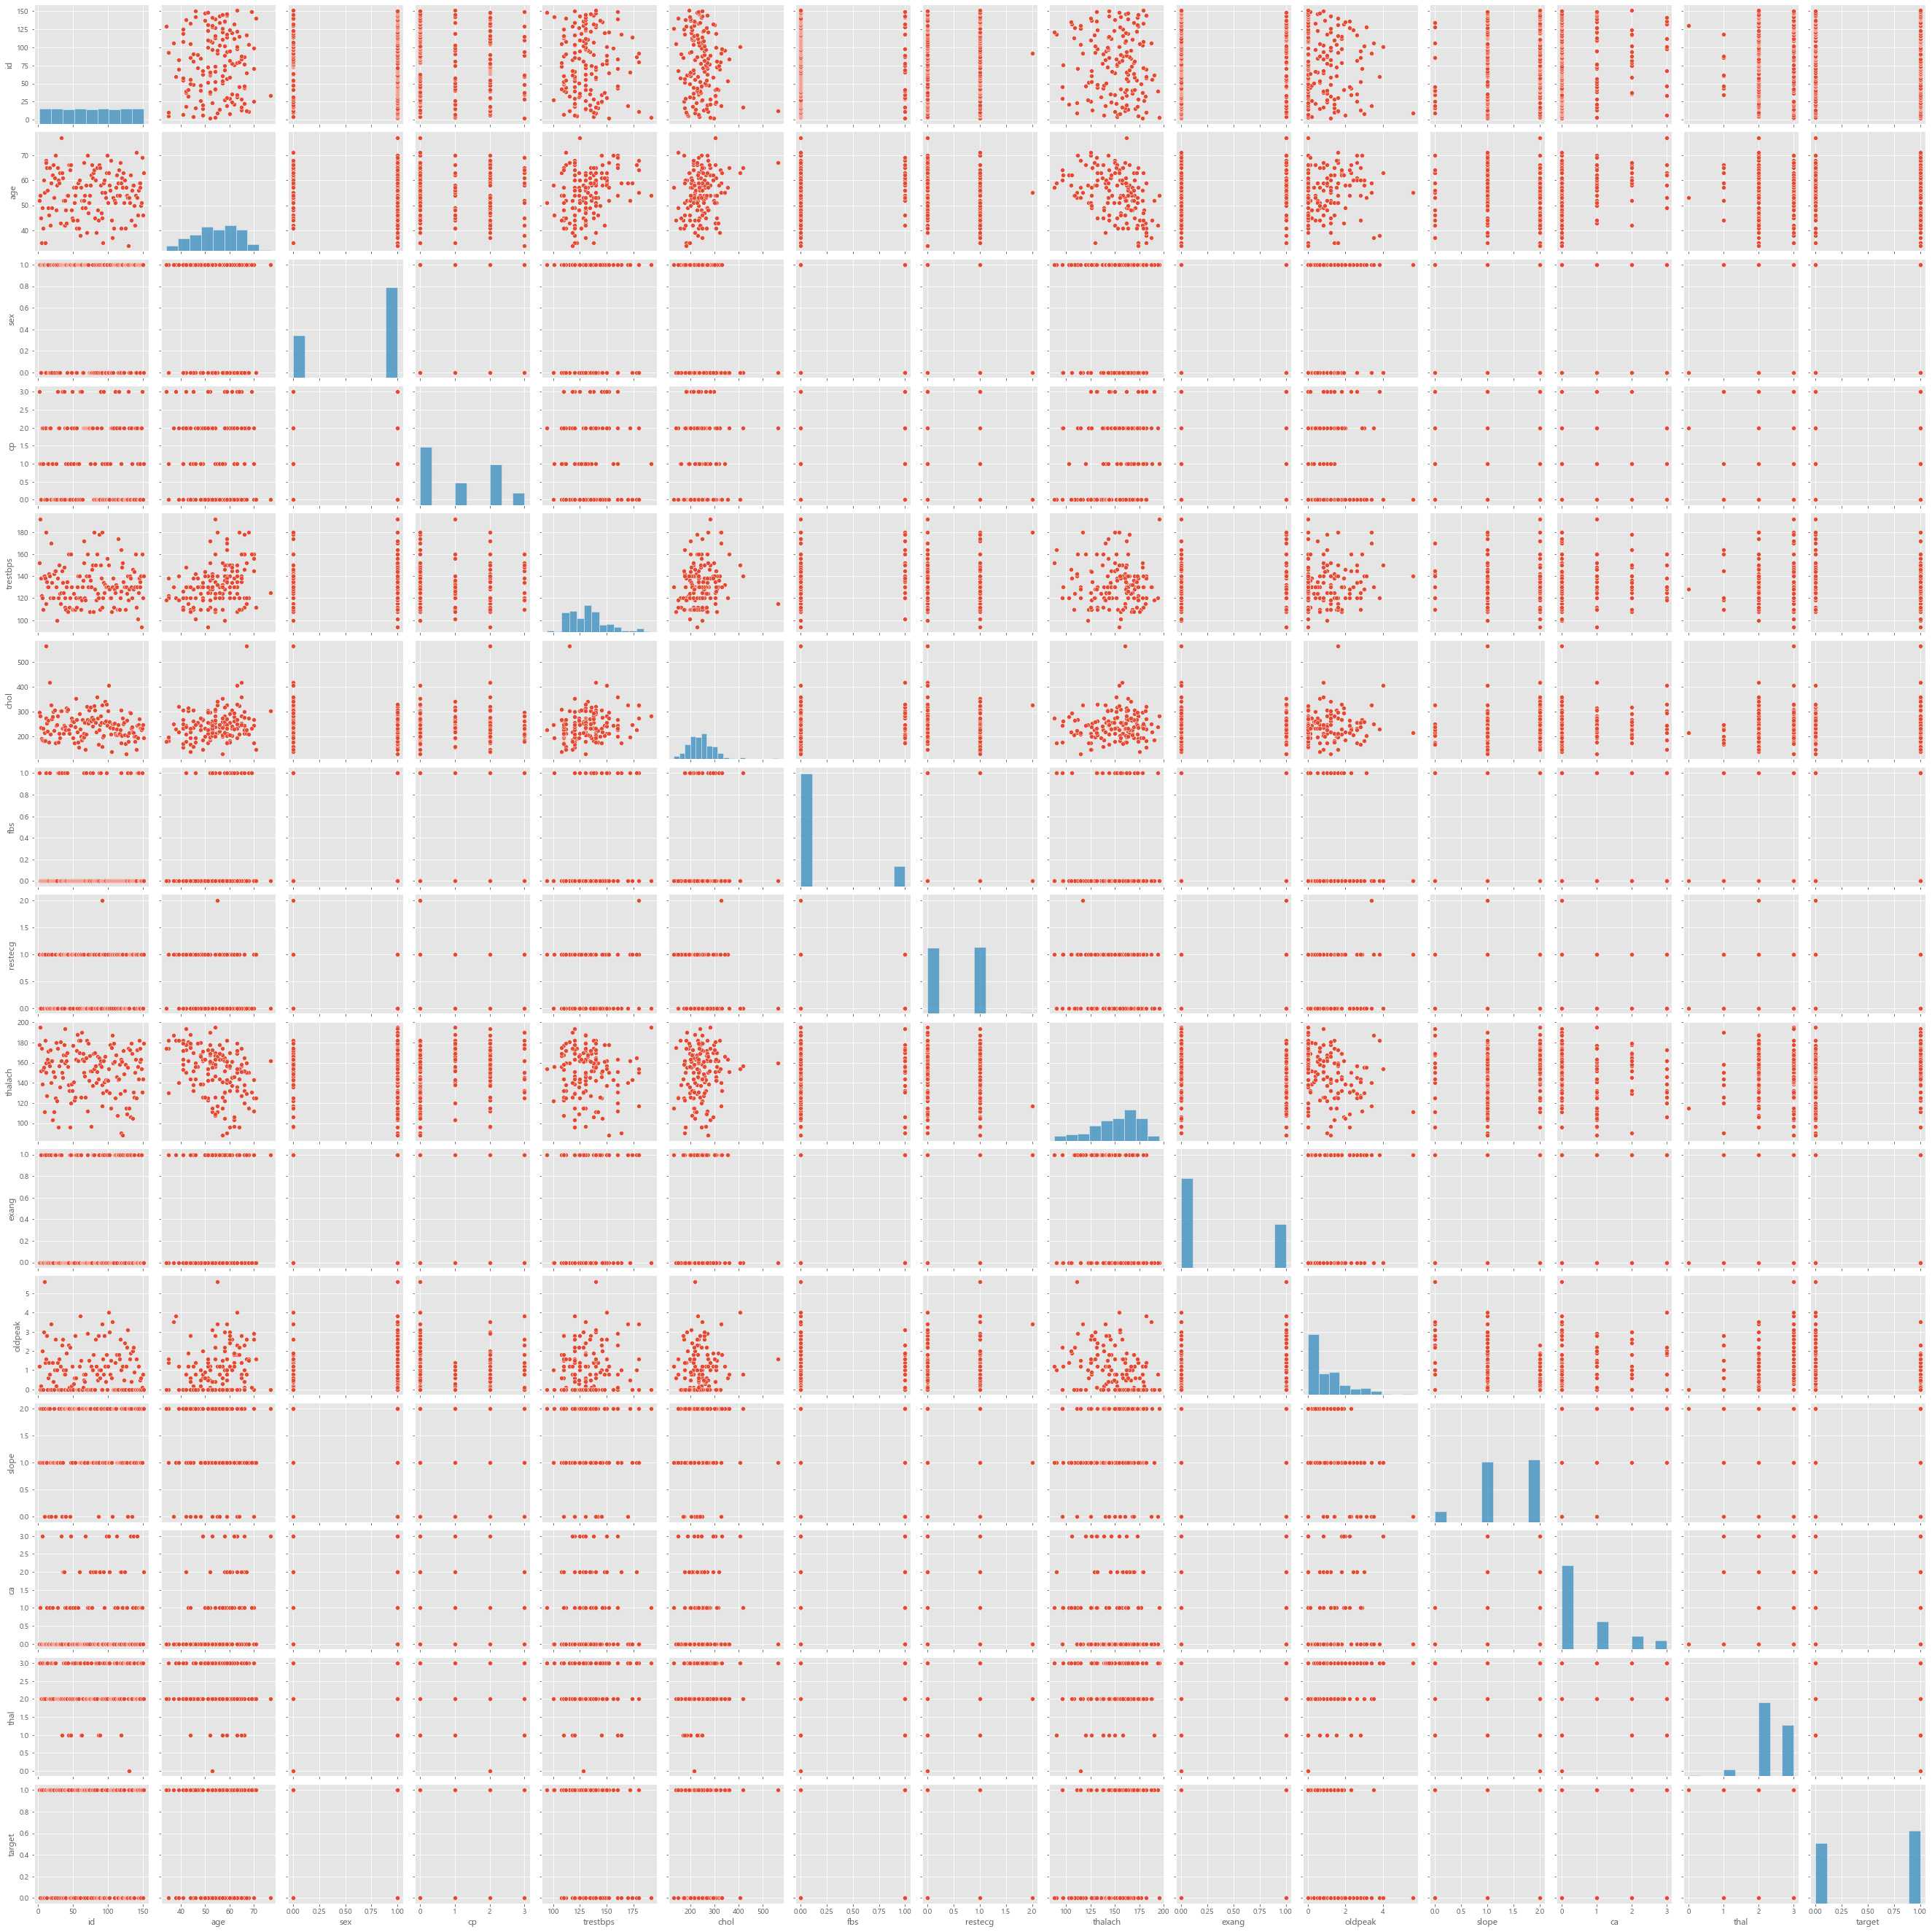

In [13]:
sns.pairplot(train[1:])

In [13]:
# 상관계수 
train_df[1:].corr()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,1.000000,0.018796,-0.020464,-0.090980,-0.048353,-0.172558,-0.005341,0.011255,-0.097363,0.075013,-0.087450,0.082087,0.145345,0.015306,-0.034948
age,0.018796,1.000000,-0.092583,-0.141841,0.333439,0.222418,0.183591,-0.232094,-0.391382,0.180681,0.187472,-0.157290,0.339226,0.029377,-0.247489
sex,-0.020464,-0.092583,1.000000,-0.015195,-0.087589,-0.258724,0.014279,-0.037889,-0.010500,0.112140,0.141041,-0.055334,0.111116,0.245318,-0.251486
cp,-0.090980,-0.141841,-0.015195,1.000000,-0.002269,-0.011556,0.221658,-0.032322,0.251999,-0.377015,-0.130423,0.115684,-0.120659,-0.229423,0.433240
trestbps,-0.048353,0.333439,-0.087589,-0.002269,1.000000,0.187352,0.265441,-0.050500,-0.037887,0.102956,0.129851,-0.041765,0.078352,0.055978,-0.122503
chol,-0.172558,0.222418,-0.258724,-0.011556,0.187352,1.000000,0.071949,-0.152902,0.109813,-0.033259,0.098034,0.080358,0.045981,0.114662,0.042316
fbs,-0.005341,0.183591,0.014279,0.221658,0.265441,0.071949,1.000000,-0.065164,-0.006513,-0.059704,-0.002261,-0.026228,0.101966,-0.041693,0.053026
restecg,0.011255,-0.232094,-0.037889,-0.032322,-0.050500,-0.152902,-0.065164,1.000000,0.032265,0.051171,0.032307,-0.015947,-0.123653,0.093881,0.023669
thalach,-0.097363,-0.391382,-0.010500,0.251999,-0.037887,0.109813,-0.006513,0.032265,1.000000,-0.334002,-0.334923,0.272753,-0.203331,-0.079438,0.365900
exang,0.075013,0.180681,0.112140,-0.377015,0.102956,-0.033259,-0.059704,0.051171,-0.334002,1.000000,0.320844,-0.269468,0.097377,0.219507,-0.393668


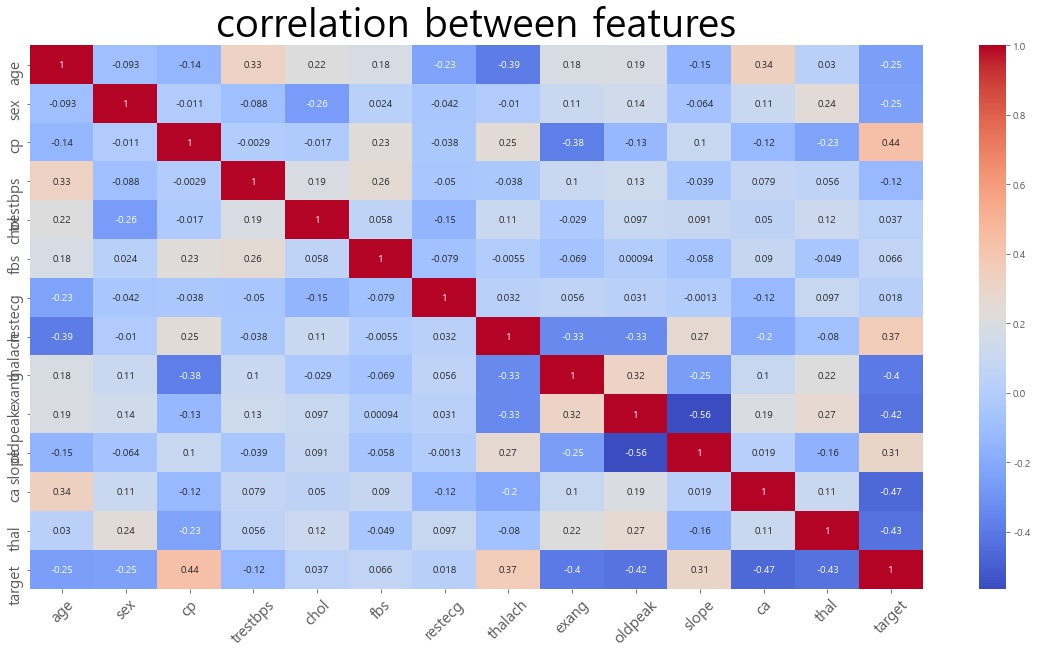

In [14]:

plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

상관계수는 연속형데이터만 의미있는게 아닌가?

<AxesSubplot:>

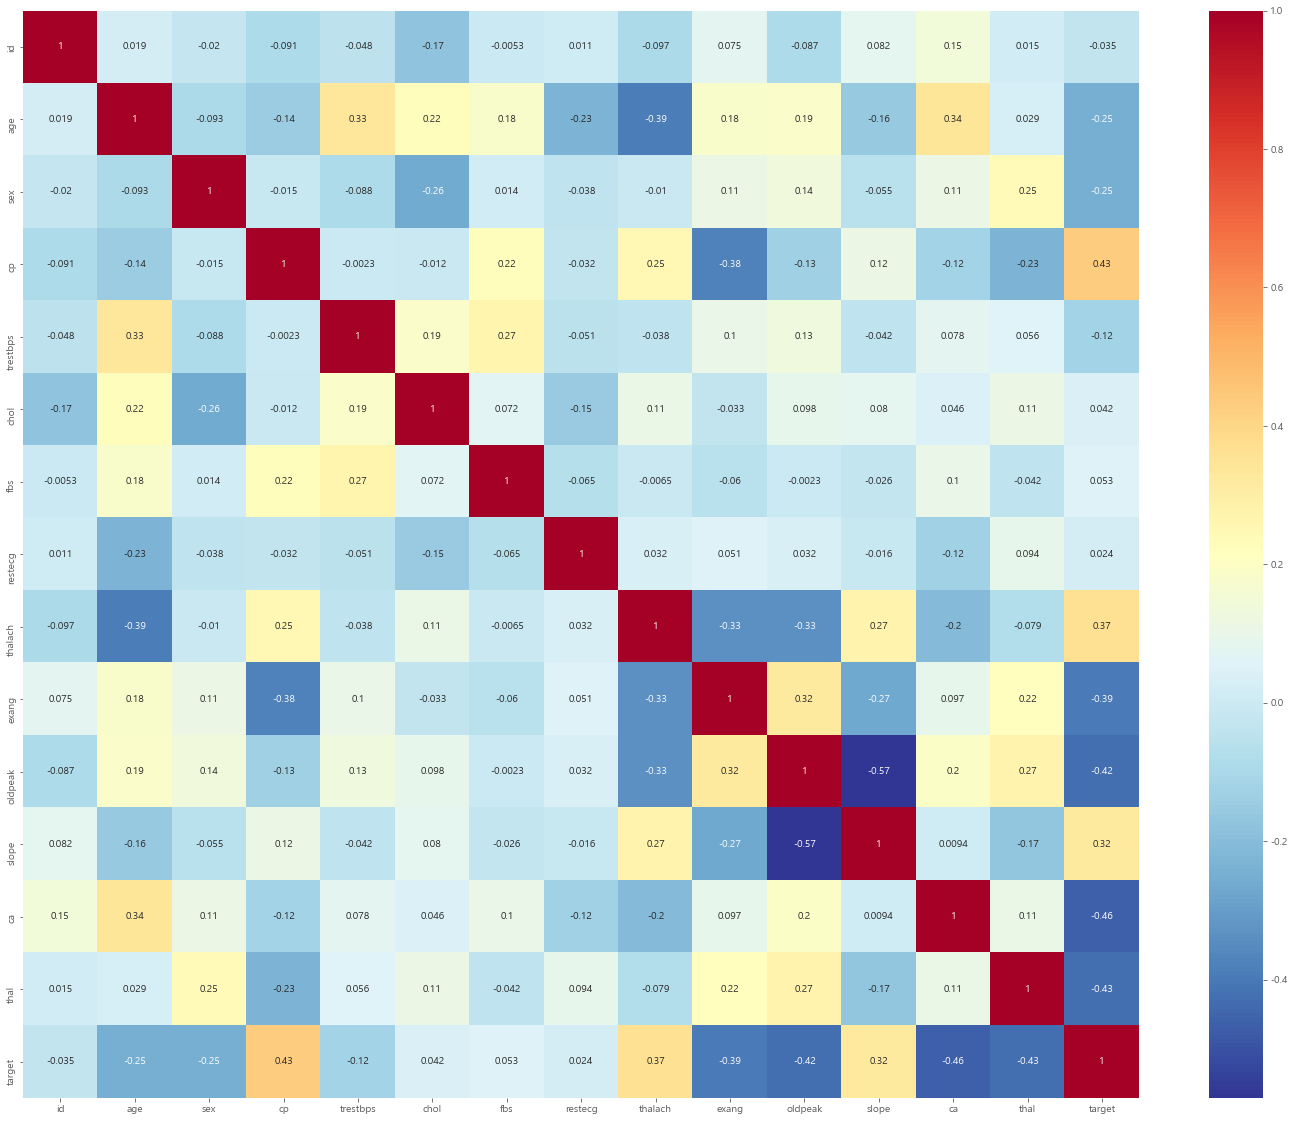

In [15]:
# 상관계수 
plt.figure(figsize=(25,20))
sns.heatmap(train[1:].corr() ,annot=True,cmap = 'RdYlBu_r',  )

In [16]:
train_df.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
# 연속형 자료
train_df.iloc[:,[ 1,4,5,8,10 ,11 ] ]

,age,trestbps,chol,thalach,oldpeak,slope
0,53,130,197,152,1.2,0
1,52,152,298,178,1.2,1
2,54,192,283,195,0.0,2
3,45,138,236,152,0.2,1
4,35,122,192,174,0.0,2
...,...,...,...,...,...,...
146,50,140,233,163,0.6,1
147,51,94,227,154,0.0,2
148,69,160,234,131,0.1,1
149,46,120,249,144,0.8,2


In [18]:
# 연속형 자료만 상관계수 확인
# 상관계수 
train_df.iloc[:,[ 1,4,5,8,10 ,11 ] ].corr()

,age,trestbps,chol,thalach,oldpeak,slope
age,1.000000,0.333521,0.222817,-0.391406,0.187196,-0.152385
trestbps,0.333521,1.000000,0.187539,-0.037929,0.129670,-0.039470
chol,0.222817,0.187539,1.000000,0.109218,0.096622,0.091094
thalach,-0.391406,-0.037929,0.109218,1.000000,-0.334791,0.267636
oldpeak,0.187196,0.129670,0.096622,-0.334791,1.000000,-0.564554
slope,-0.152385,-0.039470,0.091094,0.267636,-0.564554,1.000000


<AxesSubplot:>

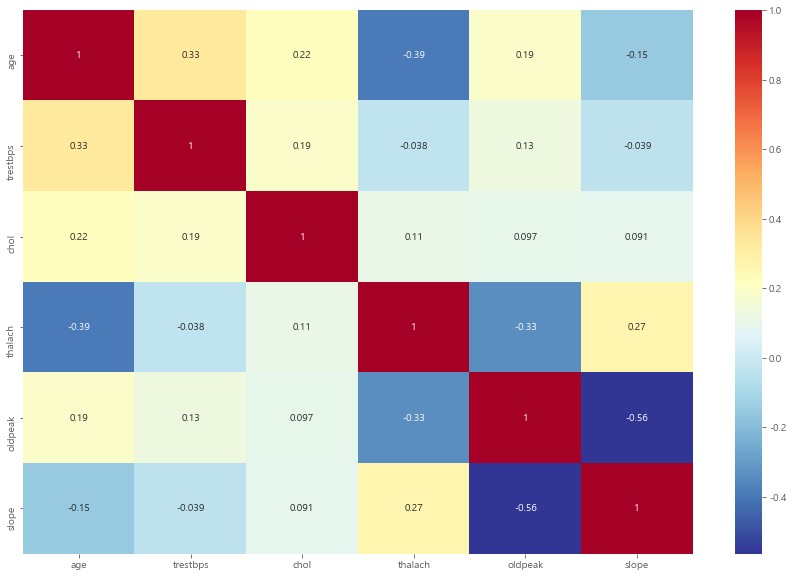

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.iloc[:,[ 1,4,5,8,10 ,11 ] ].corr() ,annot=True,cmap = 'RdYlBu_r',  )

# 훈련, 검증 안하고 f1구하기


In [28]:
X = train.iloc[:, 1:-1] # id와 target을 제거
y = train.iloc[:, -1] # target만 선택

In [92]:
X 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,53,1,2,130,197,1,0,152,0,1.2,0,0,2
1,52,1,3,152,298,1,1,178,0,1.2,1,0,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3
3,45,0,0,138,236,0,0,152,1,0.2,1,0,2
4,35,1,1,122,192,0,1,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,50,1,2,140,233,0,1,163,0,0.6,1,1,3
147,51,1,2,94,227,0,1,154,1,0.0,2,1,3
148,69,1,3,160,234,1,0,131,0,0.1,1,1,2
149,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [99]:
logistic_regression_model.densify

<bound method SparseCoefMixin.densify of LogisticRegression()>

In [91]:
logistic_regression_model.coef_

array([[ 0.00237352, -0.41871415,  0.50009692, -0.00592103,  0.00422319,
         0.11001784,  0.55347153,  0.02901733, -0.48732225, -0.86485971,
         0.01949306, -1.18632795, -1.50318286]])

In [29]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X, y)

logistic_preds = logistic_regression_model.predict(X)

print(f'accuracy: {sum(logistic_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, logistic_preds)}')

accuracy: 0.8807947019867549
f1_score : 0.8953488372093023


# 훈련, 검증 하고 f1구하기


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.5, shuffle=True,stratify=y, random_state=0)

In [59]:
logistic_regression_model.fit(x_train, y_train)
preds = logistic_regression_model.predict(x_val)
f1_score(y_val,preds)

0.8505747126436781

# 모델 학습

In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('dataset/train.csv')

train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [57]:
heat_table = train.drop(['id'], axis=1).corr()
corr_score = abs(heat_table.target[:-1])

In [47]:

logistic_regression_model = LogisticRegression()


logistic_regression_model.fit(X,y)

logistic_preds = logistic_regression_model.predict(X)

print('f1:',f1_score(y, logistic_preds  ))

f1: 0.8953488372093023


# 단계적 회귀

In [58]:
# target과 다른 feature들의 상관계수는 아래와 같습니다.
corr_score = abs(heat_table.target[:-1])

# 상관계수 절대값을 기준으로 내림차순으로 정렬합니다.
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

# train , test 나누기

In [72]:
# 성능 변화 평가를 위해 data 나누기
X = train.iloc[:, 1:-1] 
Y = train.iloc[:, -1] 

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y,stratify=Y, test_size=0.5, shuffle=True, random_state=34)

In [79]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
112,54,1,0,110,206,0,0,108,1,0.0,1,1,2
126,54,1,0,124,266,0,0,109,1,2.2,1,1,3
47,48,0,2,130,275,0,1,139,0,0.2,2,0,2
80,45,1,1,128,308,0,0,170,0,0.0,2,0,2
39,48,1,1,110,229,0,1,168,0,1.0,0,0,3


#  성능 출력

In [86]:
train.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [74]:
# 성능 출력 함수
from sklearn.metrics import f1_score

def print_score(predicted, y):
    accuracy = sum(predicted == y) / len(y)*100
    f1 = f1_score(y, predicted)*100
    print(f'accuracy: {accuracy:.2f}%') # 정확도 출력
    print(f'f1_score : {f1:.2f}%') # f1 score 출력
    return accuracy, f1


check_acc = []
check_f1 = []

In [75]:
from sklearn.linear_model import LogisticRegression
#1단계 train 데이터 준비
step_1_train_x = x_train.copy()

#1단계 train
LR_step_1_model = LogisticRegression()
LR_step_1_model.fit(step_1_train_x, y_train)
#1단계 validation 데이터 준비
step_1_val_x = x_val.copy()

#1단계 validaion
LR_step_1_preds = LR_step_1_model.predict(step_1_val_x)
acc, f1 = print_score(LR_step_1_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 78.95%
f1_score : 80.49%


In [ ]:
w 

In [76]:
#2단계 train 데이터 준비
step_2_train_x = x_train.drop("restecg",axis=1)

#2단계 train
LR_step_2_model= LogisticRegression()
LR_step_2_model.fit(step_2_train_x, y_train)

#2단계 validation 데이터 준비
step_2_val_x = x_val.drop("restecg", axis=1)

#2단계 validation
LR_step_2_preds = LR_step_2_model.predict(step_2_val_x)
acc, f1 = print_score(LR_step_2_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 78.95%
f1_score : 80.49%


In [80]:
#3단계 train 데이터 준비
step_3_train_x = x_train.drop(["restecg","chol"],axis=1)

#3단계 train 
LR_step_3_model= LogisticRegression()
LR_step_3_model.fit(step_3_train_x, y_train)

#3단계 validation 데이터 준비
step_3_val_x = x_val.drop(["restecg","chol"],axis=1)

#3단계 validation
LR_step_3_preds = LR_step_3_model.predict(step_3_val_x)
acc, f1 = print_score(LR_step_3_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 81.48%


In [85]:
# 
step_4_train_x = x_train.drop(["chol"],axis=1)

#3단계 train 
LR_step_4_model= LogisticRegression()
LR_step_4_model.fit(step_4_train_x, y_train)

#3단계 validation 데이터 준비
step_4_val_x = x_val.drop(["chol"],axis=1)

#3단계 validation
LR_step_4_preds = LR_step_4_model.predict(step_4_val_x)
acc, f1 = print_score(LR_step_4_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 80.26%
f1_score : 81.48%


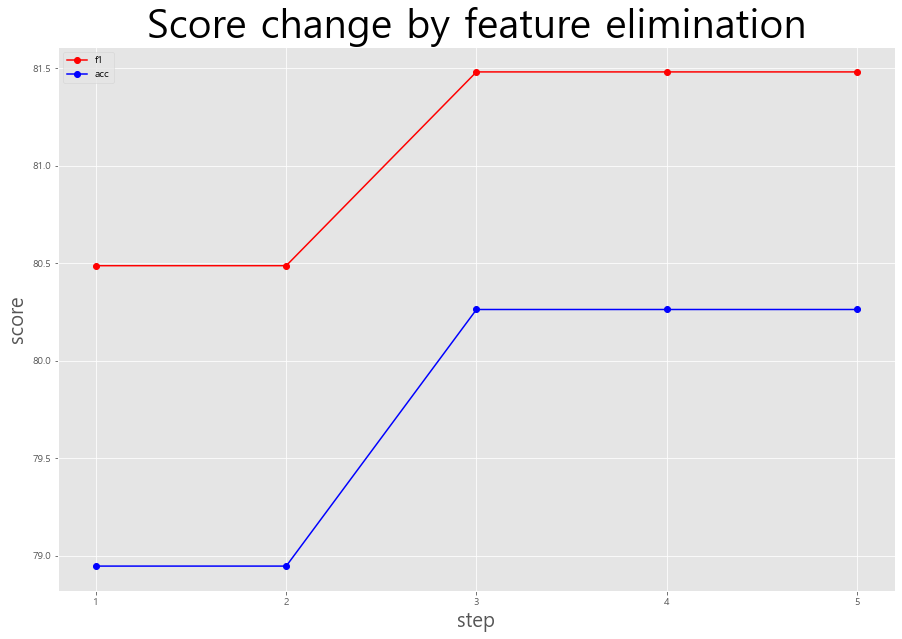

In [90]:
# 모델 성능 비교
step=[1,2,3,4,5]
#plt.bar(step,acc,label="acc")
plt.figure(figsize=(15,10))
plt.plot(step, check_f1, 'bo-', label="f1", color = 'r')
plt.plot(step, check_acc, 'bo-', label='acc', color='b')

plt.title("Score change by feature elimination", size=40)
plt.xlabel("step", size=20)
plt.ylabel("score", size=20)
plt.xticks(step)
plt.legend()
plt.show()

# 전처리 마저하자

## thal이 0인 녀석 1개  - > 삭제

In [114]:
train[train['thal'] == 0 ] 

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,130,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [124]:
train.drop( 129, inplace=True ) 


In [125]:
train[train['thal']==0]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# 딥러닝 이용해서 예측 분류 

In [101]:
train.head(3)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


## 인코딩

### 연속형,   범주형 나누기

In [129]:
# 연속형
from sklearn.preprocessing import OrdinalEncoder
ordencoder = OrdinalEncoder()

In [161]:
ord_train =  train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [164]:
ord_train.head(3)

,age,trestbps,chol,thalach,oldpeak
0,53,130,197,152,1.2
1,52,152,298,178,1.2
2,54,192,283,195,0.0


In [ ]:
(ordencoder.transform(ord_train),columns = ord_train.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 범주형 변수 sex, cp, fbs, restecg, exang, slope, ca, thal

In [128]:
train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,54.506667,132.060000,244.720000,150.866667,0.983333
std,8.933570,17.966871,56.472256,23.362238,1.086674
min,34.000000,94.000000,131.000000,88.000000,0.000000
25%,48.250000,120.000000,207.500000,137.250000,0.000000
50%,54.500000,130.000000,239.500000,155.000000,0.800000
75%,61.000000,140.000000,270.500000,168.000000,1.600000
max,77.000000,192.000000,564.000000,195.000000,5.600000


In [ ]:
train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

<AxesSubplot:>

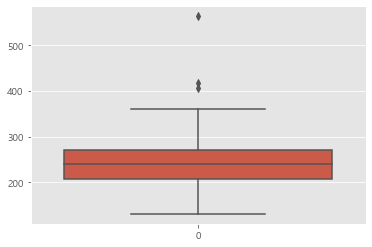

In [127]:
sns.boxplot(data = train['chol'])

In [126]:
X = train.iloc[:, 1:-1] # id와 target을 제거
y = train.iloc[:, -1] # target만 선택